In [97]:
import pandas as pd
import numpy as np

# Keyword Analysis

In [108]:
doi_results = pd.read_csv('output.csv')
doi_results.head()

,DOI,Year,Keywords
0,10.1371/journal.pone.0238557,2021.0,NaN
1,10.1098/rsos.150088,2015.0,MiSeq; community ecology; environmental DNA; m...
2,10.1371/journal.pone.0041732,2012.0,NaN
3,10.1371/journal.pone.0022746,2011.0,NaN
4,10.1098/rsbl.2008.0118,2008.0,NaN


In [109]:
# Transform the 'Year' column to integer type
doi_results['Year'] = pd.to_numeric(doi_results['Year'], errors='coerce').astype('Int64')
doi_results.head()

,DOI,Year,Keywords
0,10.1371/journal.pone.0238557,2021,NaN
1,10.1098/rsos.150088,2015,MiSeq; community ecology; environmental DNA; m...
2,10.1371/journal.pone.0041732,2012,NaN
3,10.1371/journal.pone.0022746,2011,NaN
4,10.1098/rsbl.2008.0118,2008,NaN


In [110]:
trend_by_years = doi_results.groupby('Year').size().reset_index(name='Count')

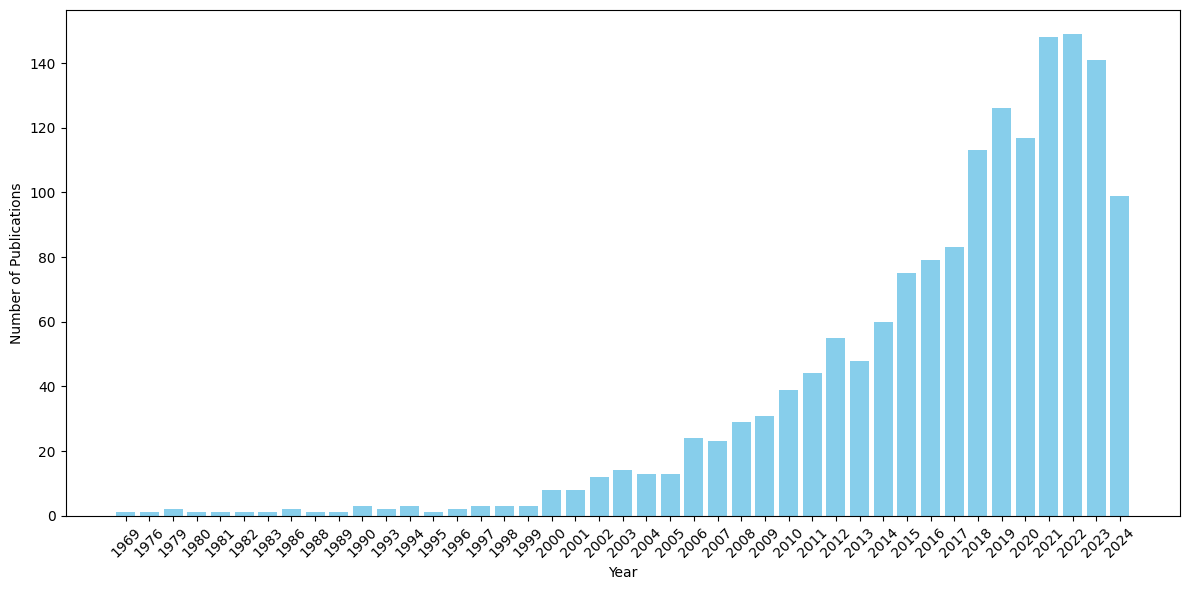

In [111]:
# Build a histogram of the number of DOIs per year
trend_by_years = trend_by_years.sort_values(by='Year')
trend_by_years['Year'] = trend_by_years['Year'].astype(str)
trend_by_years['Count'] = trend_by_years['Count'].astype(int)


# Plotting the trend
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(trend_by_years['Year'], trend_by_years['Count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('doi_trend_by_years.png')
plt.show()

In [112]:
# Select the row with the maximum count
trend_by_years_max = trend_by_years.loc[trend_by_years['Count'].idxmax()]
trend_by_years_max

Year     2022
Count     149
Name: 40, dtype: object

In [113]:
trend_by_years[trend_by_years['Year'] == '2024']

,Year,Count
42,2024,99


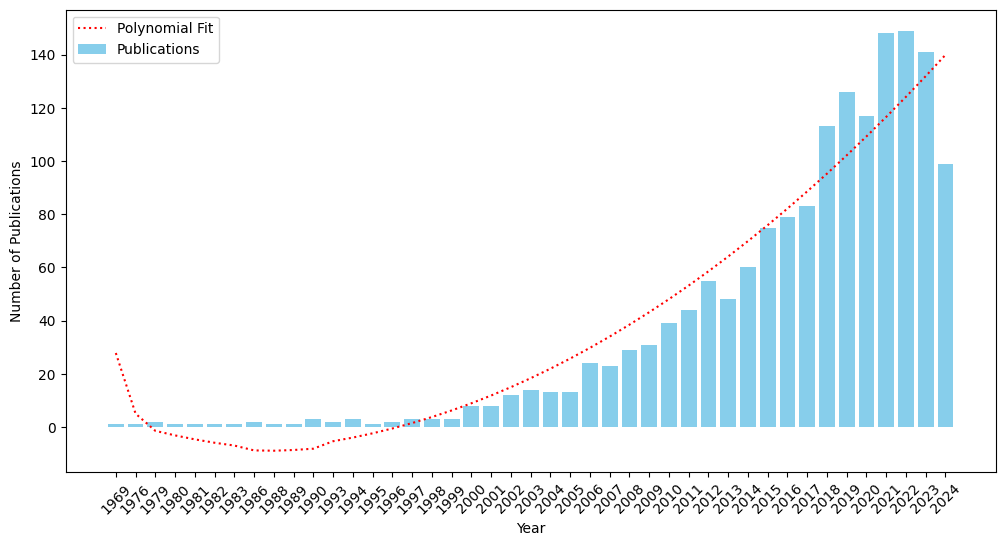

In [114]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# # Linear regression
# X = trend_by_years['Year'].values.reshape(-1, 1)
# y = trend_by_years['Count'].values
# model = LinearRegression().fit(X, y)

# # Predictions
# trend_by_years['Predicted_Linear'] = model.predict(X)

# Polynomial regression (degree 2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression().fit(X_poly, y)
trend_by_years['Predicted_Poly'] = model_poly.predict(X_poly)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(trend_by_years['Year'], trend_by_years['Count'], color='skyblue', label='Publications')
# plt.plot(trend_by_years['Year'], trend_by_years['Count'], label='Actual')
# plt.plot(trend_by_years['Year'], trend_by_years['Predicted_Linear'], '--', label='Linear Fit')
plt.plot(trend_by_years['Year'], trend_by_years['Predicted_Poly'], ':', label='Polynomial Fit', color='red')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.show()


In [115]:
trend_by_years['Growth Rate (%)'] = trend_by_years['Count'].pct_change() * 100
trend_by_years

,Year,Count,Predicted_Poly,Growth Rate (%)
0,1969,1,27.844133,NaN
1,1976,1,5.043867,0.000000
2,1979,2,-1.418281,100.000000
3,1980,1,-3.131078,-50.000000
4,1981,1,-4.623249,0.000000
5,1982,1,-5.894793,0.000000
6,1983,1,-6.945711,0.000000
7,1986,2,-8.774708,100.000000
8,1988,1,-8.890908,-50.000000
9,1989,1,-8.618069,0.000000


In [118]:
keyword_df = doi_results.dropna(subset=['Keywords'])
keyword_df

,DOI,Year,Keywords
1,10.1098/rsos.150088,2015,MiSeq; community ecology; environmental DNA; m...
8,10.7717/peerj.14071,2022,Assessment; Biodiversity; Biomonitoring; Manag...
11,10.1002/ece3.4213,2018,Arctic; coastal biodiversity; eDNA metabarcodi...
13,10.1186/1742-9994-10-34,2013,DNA barcoding; Food web; Mini-barcode; Mitocho...
16,10.1002/ece3.10275,2023,cascade hydropower; environmental DNA; fish di...
...,...,...,...
1599,10.1128/spectrum.01112-23,2023,Gemmatimonadota; MAGs; RuBisCO; anoxygenic pho...
1602,10.1093/molbev/msv092,2015,Medicago truncatula; SNP; linkage disequilibri...
1603,10.3390/v10120715,2018,MCP; algal viruses; arctic; g23; marine; metab...
1605,10.1073/pnas.1319778111,2014,Bayesian network; microbial ecology; virus


In [119]:
keyword_df["Keywords"] = keyword_df["Keywords"].str.split("; ")

all_keywords = [kw.strip().lower() for sublist in keyword_df["Keywords"] for kw in sublist]

/tmp/ipykernel_57886/2704260124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_df["Keywords"] = keyword_df["Keywords"].str.split("; ")


/tmp/ipykernel_57886/3716708952.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=labels, palette="viridis")


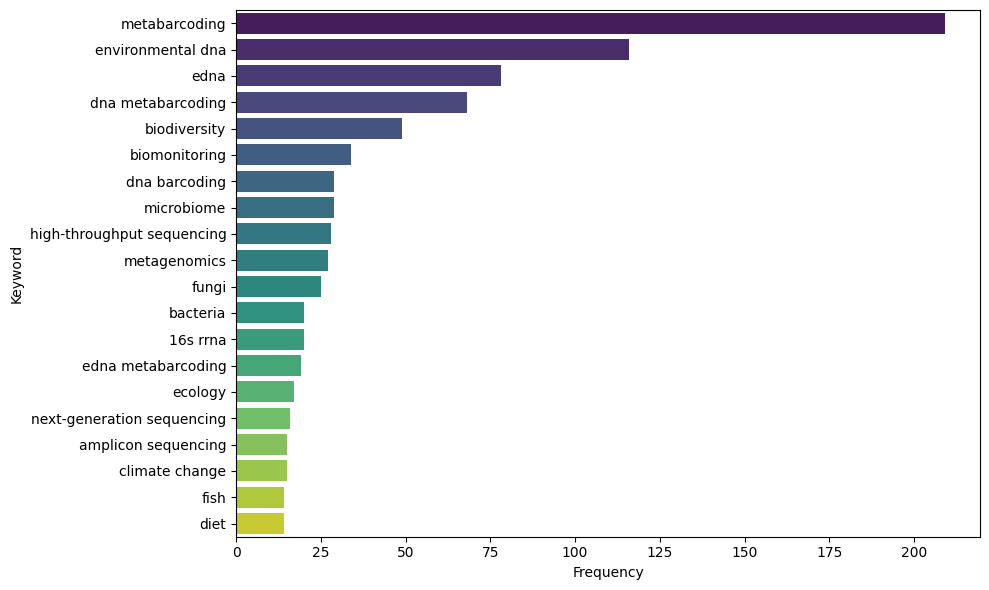

In [122]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Count keyword frequency
keyword_counts = Counter(all_keywords)
common_keywords = keyword_counts.most_common(20)

# Plot
labels, values = zip(*common_keywords)
plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=labels, palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.tight_layout()
plt.show()


In [123]:
common_keywords = []
for kw, count in keyword_counts.most_common(20):
    common_keywords.append(kw)

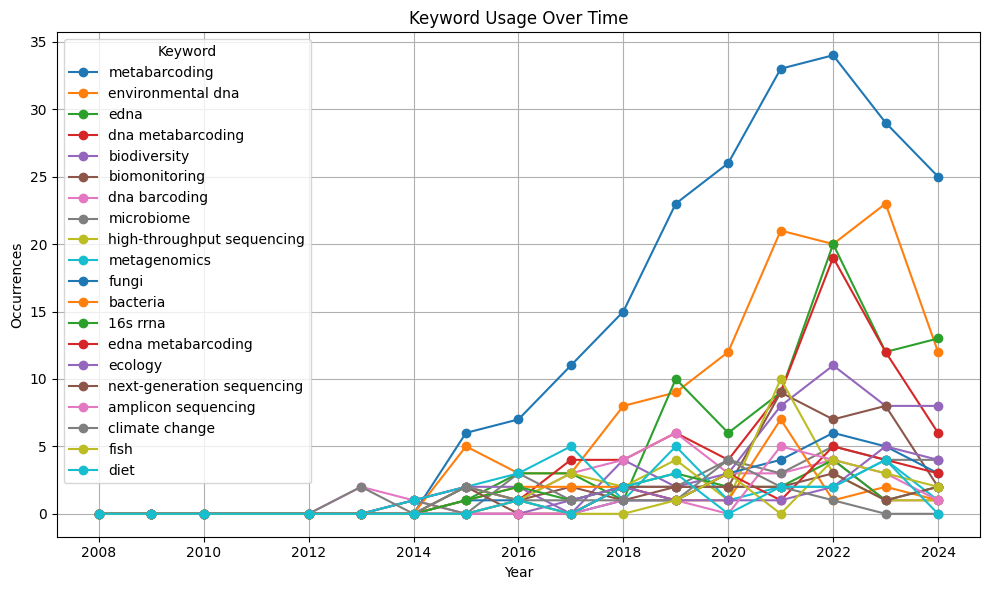

In [125]:
from collections import defaultdict

# Initialize dictionary of keyword counts by year
keyword_years = defaultdict(lambda: defaultdict(int))

for _, row in keyword_df.iterrows():
    year = row["Year"]
    if year == "N/A":
        continue
    for kw in row["Keywords"]:
        keyword_years[kw.strip().lower()][year] += 1

# Convert to DataFrame for plotting
keyword_df = pd.DataFrame(keyword_years).fillna(0).astype(int).sort_index()

# Select keywords to track
# keywords_to_plot = ["edna", "monitoring", "biodiversity", "metabarcoding"]
keyword_df[common_keywords].plot(figsize=(10, 6), marker='o')
plt.title("Keyword Usage Over Time")
plt.xlabel("Year")
plt.ylabel("Occurrences")
plt.legend(title="Keyword")
plt.grid(True)
plt.tight_layout()
plt.show()


In [164]:
keyword_years = {kw: keyword_years[kw] for kw in common_keywords}

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from datetime import datetime
from collections import defaultdict

def create_sankey_from_keyword_years(keyword_years, min_total_count=10, top_n_keywords=12):
    """
    Create a Sankey diagram from keyword_years dictionary

    Parameters:
    - keyword_years: dict with keyword: {year: count} structure
    - min_total_count: minimum total occurrences to include keyword
    - top_n_keywords: maximum number of keywords to display
    """

    # Step 1: Convert dictionary to DataFrame
    all_years = set()
    for year_counts in keyword_years.values():
        all_years.update(year_counts.keys())

    year_range = sorted(all_years)
    print(f"Year range: {min(year_range)} - {max(year_range)}")

    # Create DataFrame with keywords as rows, years as columns
    data_rows = []
    for keyword, year_counts in keyword_years.items():
        row = {'keyword': keyword}
        for year in year_range:
            row[year] = year_counts.get(year, 0)
        data_rows.append(row)

    df = pd.DataFrame(data_rows).set_index('keyword')
    print(f"Created DataFrame: {len(df)} keywords × {len(year_range)} years")

    # Step 2: Define time periods based on your data
    time_periods = {
        "2013-2016\n(Early)": list(range(2013, 2017)),
        "2017-2019\n(Growth)": list(range(2017, 2020)),
        "2020-2021\n(Expansion)": list(range(2020, 2022)),
        "2022-2023\n(Maturation)": list(range(2022, 2024)),
        "2024\n(Current)": [2024]
    }

    # Step 3: Aggregate data by time periods
    period_data = {}
    for period_name, years in time_periods.items():
        # Sum counts for years in this period (only if year exists in data)
        existing_years = [y for y in years if y in df.columns]
        if existing_years:
            period_data[period_name] = df[existing_years].sum(axis=1)
        else:
            period_data[period_name] = pd.Series(0, index=df.index)

    # Create period DataFrame
    df_periods = pd.DataFrame(period_data)
    df_periods['total'] = df_periods.sum(axis=1)

    # Step 4: Filter and select top keywords
    # Filter by minimum total count
    df_filtered = df_periods[df_periods['total'] >= min_total_count].copy()

    # Select top N keywords by total activity
    df_top = df_filtered.nlargest(top_n_keywords, 'total').drop('total', axis=1)

    print(f"Selected {len(df_top)} keywords for visualization")

    # Step 5: Set up Sankey parameters
    num_keywords = len(df_top)
    num_periods = len(time_periods)
    period_names = list(time_periods.keys())

    # Step 6: Categorize keywords and assign colors
    keyword_categories = {
        'sequencing': ['sequenc', 'amplicon', 'throughput', 'generation'],
        'molecular': ['metabarco', 'barco', 'edna', 'dna'],
        'ecology': ['climat', 'ecolog', 'biodivers', 'environment'],
        'microbiome': ['microbiom', 'bacteri', 'metagenom', '16s', 'rrna'],
        'monitoring': ['biomonitor', 'monitor'],
        'organisms': ['fish', 'fungi', 'bacteria'],
        'analysis': ['diet', 'analys']
    }

    category_colors = {
        'sequencing': '#1f77b4',   # Blue
        'molecular': '#ff7f0e',    # Orange
        'ecology': '#2ca02c',      # Green
        'microbiome': '#d62728',   # Red
        'monitoring': '#9467bd',   # Purple
        'organisms': '#8c564b',    # Brown
        'analysis': '#17becf'      # Cyan
    }

    def categorize_keyword(keyword):
        keyword_lower = keyword.lower()
        for category, patterns in keyword_categories.items():
            if any(pattern in keyword_lower for pattern in patterns):
                return category
        return 'other'

    keyword_colors = {}
    for keyword in df_top.index:
        category = categorize_keyword(keyword)
        keyword_colors[keyword] = category_colors.get(category, '#7f7f7f')

    # Step 7: Create Sankey nodes and links
    labels = []
    node_colors = []
    node_x = []
    node_y = []

    # Create nodes for each keyword in each period
    for period_idx in range(num_periods):
        x_pos = period_idx / (num_periods - 1)
        for keyword_idx, keyword in enumerate(df_top.index):
            labels.append(keyword)
            node_colors.append(keyword_colors[keyword])
            node_x.append(x_pos)
            node_y.append((keyword_idx + 0.5) / num_keywords)

    # Create links between consecutive periods
    source = []
    target = []
    value = []
    link_colors = []

    for period in range(num_periods - 1):
        for i, keyword in enumerate(df_top.index):
            current_count = df_top.iloc[i, period]
            next_count = df_top.iloc[i, period + 1]

            # Show connection if there's activity in either period
            if current_count > 0 or next_count > 0:
                source_idx = i + period * num_keywords
                target_idx = i + (period + 1) * num_keywords

                # Use next period's count as link value
                link_value = max(1, next_count)

                source.append(source_idx)
                target.append(target_idx)
                value.append(link_value)

                # Color link based on keyword category
                base_color = keyword_colors[keyword]
                hex_color = base_color.lstrip('#')
                rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

                # Opacity based on activity strength
                max_count = df_top.max().max()
                opacity = 0.4 + (link_value / max_count) * 0.4
                link_colors.append(f'rgba({rgb[0]}, {rgb[1]}, {rgb[2]}, {opacity})')

    # Step 8: Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        arrangement="snap",
        node=dict(
            pad=12,
            thickness=18,
            line=dict(color="white", width=1.5),
            label=labels,
            color=node_colors,
            x=node_x,
            y=node_y,
            customdata=[f"{period_names[i // num_keywords]}\nCount: {df_top.iloc[i % num_keywords, i // num_keywords]}"
                       for i in range(len(labels))],
            hovertemplate='<b>%{label}</b><br>%{customdata}<extra></extra>'
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            color=link_colors,
            hovertemplate='<b>%{source.label}</b> → <b>%{target.label}</b><br>Activity: %{value}<extra></extra>'
        )
    )])

    # Step 9: Create legend and layout
    legend_annotations = [
        dict(
            text="<b>Research Categories:</b>",
            xref="paper", yref="paper",
            x=1.02, y=0.95,
            xanchor="left", yanchor="top",
            showarrow=False,
            font=dict(size=14, color="black")
        )
    ]

    # Add category legend
    categories_used = set(categorize_keyword(k) for k in df_top.index)
    y_pos = 0.88
    for category, color in category_colors.items():
        if category in categories_used:
            count = sum(1 for k in df_top.index if categorize_keyword(k) == category)
            legend_annotations.append(dict(
                text=f'<b style="color:{color}">●</b> {category.title()} ({count})',
                xref="paper", yref="paper",
                x=1.02, y=y_pos,
                xanchor="left", yanchor="top",
                showarrow=False,
                font=dict(size=11)
            ))
            y_pos -= 0.06

    # Add period labels
    for i, period_name in enumerate(period_names):
        legend_annotations.append(dict(
            text=f"<b>{period_name}</b>",
            x=i/(num_periods-1), y=1.08,
            xref="x", yref="paper",
            showarrow=False,
            font=dict(size=11, color="navy"),
            xanchor="center"
        ))

    # Final layout
    current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    fig.update_layout(
        title={
            'text': f"<b>Research Keyword Evolution Over Time</b><br>" +
                    f"<sub>Top {num_keywords} Keywords | {current_time}</sub>",
            'x': 0.5,
            'xanchor': 'center',
            'font': {'size': 18}
        },
        font_size=10,
        height=700,
        width=1400,
        margin=dict(l=50, r=220, t=100, b=50),
        paper_bgcolor='white',
        annotations=legend_annotations
    )

    return fig, df_top

# Create and display the Sankey diagram
fig, data_summary = create_sankey_from_keyword_years(keyword_years)

# Display the plot
fig.show()

# Save the plot
filename = f"sankey_keyword_evolution.html"
fig.write_html(filename)

print(f"\nSankey diagram saved as: {filename}")

Year range: 2013 - 2024
Created DataFrame: 20 keywords × 12 years
Selected 12 keywords for visualization

Sankey diagram created successfully!
Saved as: sankey_keyword_evolution_20250528_163443.html


# MeSH Analysis

In [1]:
from Bio import Entrez

Entrez.email = "camila.babo@cibio.up.pt"

stream = Entrez.einfo(db="pubmed")

record = Entrez.read(stream)

for field in record["DbInfo"]["FieldList"]:

    print("%(Name)s, %(FullName)s, %(Description)s" % field)

ALL, All Fields, All terms from all searchable fields
UID, UID, Unique number assigned to publication
FILT, Filter, Limits the records
TITL, Title, Words in title of publication
MESH, MeSH Terms, Medical Subject Headings assigned to publication
MAJR, MeSH Major Topic, MeSH terms of major importance to publication
JOUR, Journal, Journal abbreviation of publication
AFFL, Affiliation, Author's institutional affiliation and address
ECNO, EC/RN Number, EC number for enzyme or CAS registry number
SUBS, Supplementary Concept, CAS chemical name or MEDLINE Substance Name
PDAT, Date - Publication, Date of publication
EDAT, Date - Entry, Date publication first accessible through Entrez
VOL, Volume, Volume number of publication
PAGE, Pagination, Page number(s) of publication
PTYP, Publication Type, Type of publication (e.g., review)
LANG, Language, Language of publication
ISS, Issue, Issue number of publication
SUBH, MeSH Subheading, Additional specificity for MeSH term
SI, Secondary Source ID, Cr

In [26]:
import pandas as pd
doi_results = pd.read_csv('output-mesh-terms.csv')
doi_results.head()

,DOI,Year,Keywords,MeSH Terms,Major Topics,Subheadings
0,10.1371/journal.pone.0238557,2021.0,NaN,Animals; Biodiversity; Biological Monitoring; ...,NaN,Methods; Analysis; Methods; Analysis; Methods;...
1,10.1098/rsos.150088,2015.0,MiSeq; community ecology; environmental DNA; m...,NaN,NaN,NaN
2,10.1371/journal.pone.0041732,2012.0,NaN,Animals; Biodiversity; Birds; Dna; Denmark; Ec...,Biodiversity; Ecosystem,Physiology; Metabolism; Methods; Physiology; M...
3,10.1371/journal.pone.0022746,2011.0,NaN,Animals; Anura; Aquatic Organisms; Dna; Ecosys...,Ecosystem; Rivers,Genetics; Genetics; Isolation & Purification; ...
4,10.1098/rsbl.2008.0118,2008.0,NaN,"Animals; Biodiversity; Dna, Mitochondrial; Env...",Biodiversity,Analysis; Methods; Chemistry; Genetics


In [27]:
mesh_df = doi_results.dropna(subset=['MeSH Terms'])
mesh_df

,DOI,Year,Keywords,MeSH Terms,Major Topics,Subheadings
0,10.1371/journal.pone.0238557,2021.0,NaN,Animals; Biodiversity; Biological Monitoring; ...,NaN,Methods; Analysis; Methods; Analysis; Methods;...
2,10.1371/journal.pone.0041732,2012.0,NaN,Animals; Biodiversity; Birds; Dna; Denmark; Ec...,Biodiversity; Ecosystem,Physiology; Metabolism; Methods; Physiology; M...
3,10.1371/journal.pone.0022746,2011.0,NaN,Animals; Anura; Aquatic Organisms; Dna; Ecosys...,Ecosystem; Rivers,Genetics; Genetics; Isolation & Purification; ...
4,10.1098/rsbl.2008.0118,2008.0,NaN,"Animals; Biodiversity; Dna, Mitochondrial; Env...",Biodiversity,Analysis; Methods; Chemistry; Genetics
5,10.1093/nar/24.16.3189,1996.0,NaN,Alleles; Animals; Base Sequence; Computer Simu...,NaN,Chemistry; Methods; Genetics
...,...,...,...,...,...,...
1600,10.1038/ismej.2012.125,2013.0,NaN,Archaea; Bacteria; Denitrification; Ecosystem;...,Denitrification; Phylogeny; Soil Microbiology,Classification; Enzymology; Genetics; Classifi...
1602,10.1093/molbev/msv092,2015.0,Medicago truncatula; SNP; linkage disequilibri...,"Adaptation, Physiological; Bacteria; Genes, Pl...","Genes, Plant; Medicago Truncatula; Plant Roots...",Genetics; Growth & Development; Genetics; Micr...
1603,10.3390/v10120715,2018.0,MCP; algal viruses; arctic; g23; marine; metab...,"Arctic Regions; Biodiversity; Dna Barcoding, T...",Ecosystem; Microbiota; Seasons,Genetics; Physiology; Virology; Genetics; Viro...
1604,10.1038/ismej.2015.125,2016.0,NaN,Antarctic Regions; Ecosystem; Metagenomics; Oc...,NaN,Virology; Classification; Genetics; Growth & D...


In [28]:
mesh_df["MeSH Terms"] = mesh_df["MeSH Terms"].str.split("; ")

all_mesh_terms = [kw.strip().lower() for sublist in mesh_df["MeSH Terms"] for kw in sublist]
all_mesh_terms

/tmp/ipykernel_23042/896012301.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['animals',
 'biodiversity',
 'biological monitoring',
 'california',
 'dna',
 'dna barcoding, taxonomic',
 'dna, environmental',
 'ecological parameter monitoring',
 'ecosystem',
 'environmental monitoring',
 'fishes',
 'pacific ocean',
 'animals',
 'biodiversity',
 'birds',
 'dna',
 'denmark',
 'ecosystem',
 'environment',
 'environmental monitoring',
 'fishes',
 'marine biology',
 'models, statistical',
 'oceans and seas',
 'polymerase chain reaction',
 'seawater',
 'animals',
 'anura',
 'aquatic organisms',
 'dna',
 'ecosystem',
 'electrophoresis',
 'idaho',
 'polymerase chain reaction',
 'rivers',
 'species specificity',
 'caudata',
 'water',
 'animals',
 'biodiversity',
 'dna, mitochondrial',
 'environmental monitoring',
 'fresh water',
 'rana catesbeiana',
 'wetlands',
 'alleles',
 'animals',
 'base sequence',
 'computer simulation',
 'feces',
 'genotype',
 'guidelines as topic',
 'models, theoretical',
 'molecular sequence data',
 'polymerase chain reaction',
 'reproducibility 

In [29]:
# Count keyword frequency
from collections import Counter
mesh_counts = Counter(all_mesh_terms)
common_mesh= mesh_counts.most_common(20)

In [30]:
mesh_counts

Counter({'animals': 584,
         'biodiversity': 364,
         'dna barcoding, taxonomic': 356,
         'ecosystem': 338,
         'phylogeny': 237,
         'bacteria': 160,
         'humans': 160,
         'environmental monitoring': 150,
         'sequence analysis, dna': 135,
         'dna, environmental': 133,
         'dna': 119,
         'rna, ribosomal, 16s': 113,
         'fishes': 93,
         'molecular sequence data': 92,
         'polymerase chain reaction': 83,
         'high-throughput nucleotide sequencing': 83,
         'fungi': 83,
         'microbiota': 79,
         'metagenomics': 78,
         'soil microbiology': 74,
         'seawater': 71,
         'dna, ribosomal': 70,
         'seasons': 69,
         'plants': 68,
         'soil': 66,
         'species specificity': 64,
         'base sequence': 61,
         'dna, bacterial': 60,
         'conservation of natural resources': 59,
         'rna, ribosomal, 18s': 59,
         'genetic variation': 58,
         'g

/tmp/ipykernel_23042/4225481332.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




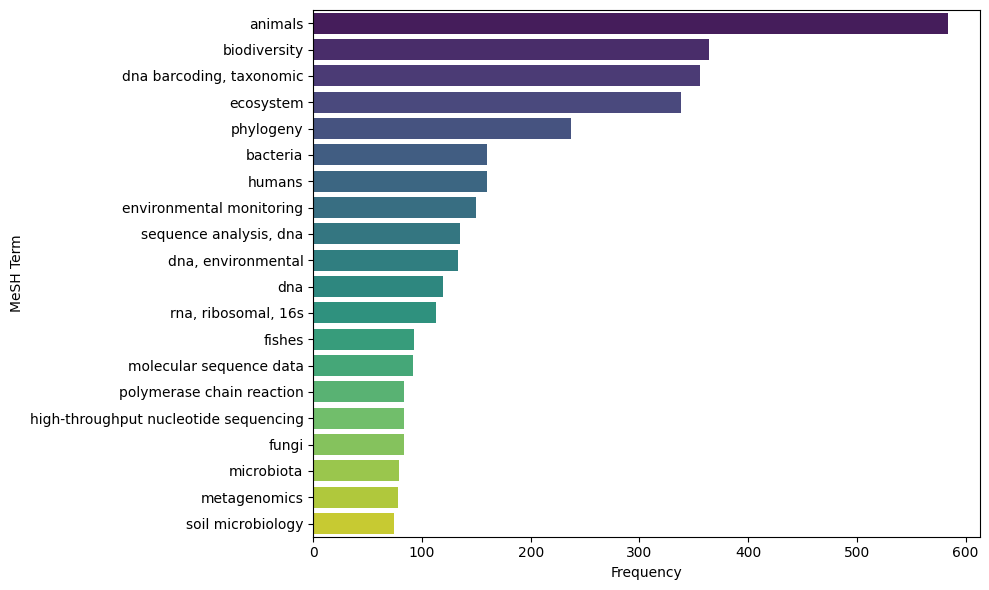

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
labels, values = zip(*common_mesh)
plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=labels, palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("MeSH Term")
plt.tight_layout()
plt.show()

In [7]:
common_mesh = []
for kw, count in mesh_counts.most_common(20):
    common_mesh.append(kw)

In [8]:
mesh_df

,DOI,Year,Keywords,MeSH Terms,Major Topics,Subheadings
0,10.1371/journal.pone.0238557,2021.0,NaN,"[Animals, Biodiversity, Biological Monitoring,...",NaN,Methods; Analysis; Methods; Analysis; Methods;...
2,10.1371/journal.pone.0041732,2012.0,NaN,"[Animals, Biodiversity, Birds, Dna, Denmark, E...",Biodiversity; Ecosystem,Physiology; Metabolism; Methods; Physiology; M...
3,10.1371/journal.pone.0022746,2011.0,NaN,"[Animals, Anura, Aquatic Organisms, Dna, Ecosy...",Ecosystem; Rivers,Genetics; Genetics; Isolation & Purification; ...
4,10.1098/rsbl.2008.0118,2008.0,NaN,"[Animals, Biodiversity, Dna, Mitochondrial, En...",Biodiversity,Analysis; Methods; Chemistry; Genetics
5,10.1093/nar/24.16.3189,1996.0,NaN,"[Alleles, Animals, Base Sequence, Computer Sim...",NaN,Chemistry; Methods; Genetics
...,...,...,...,...,...,...
1600,10.1038/ismej.2012.125,2013.0,NaN,"[Archaea, Bacteria, Denitrification, Ecosystem...",Denitrification; Phylogeny; Soil Microbiology,Classification; Enzymology; Genetics; Classifi...
1602,10.1093/molbev/msv092,2015.0,Medicago truncatula; SNP; linkage disequilibri...,"[Adaptation, Physiological, Bacteria, Genes, P...","Genes, Plant; Medicago Truncatula; Plant Roots...",Genetics; Growth & Development; Genetics; Micr...
1603,10.3390/v10120715,2018.0,MCP; algal viruses; arctic; g23; marine; metab...,"[Arctic Regions, Biodiversity, Dna Barcoding, ...",Ecosystem; Microbiota; Seasons,Genetics; Physiology; Virology; Genetics; Viro...
1604,10.1038/ismej.2015.125,2016.0,NaN,"[Antarctic Regions, Ecosystem, Metagenomics, O...",NaN,Virology; Classification; Genetics; Growth & D...


In [9]:
from collections import defaultdict
mesh_years = defaultdict(lambda: defaultdict(int))

for _, row in mesh_df.iterrows():
    year = row["Year"]
    if year == "N/A":
        continue
    for kw in row["MeSH Terms"]:
        mesh_years[kw.strip().lower()][year] += 1

mesh_term_years = pd.DataFrame(mesh_years).fillna(0).astype(int).sort_index()

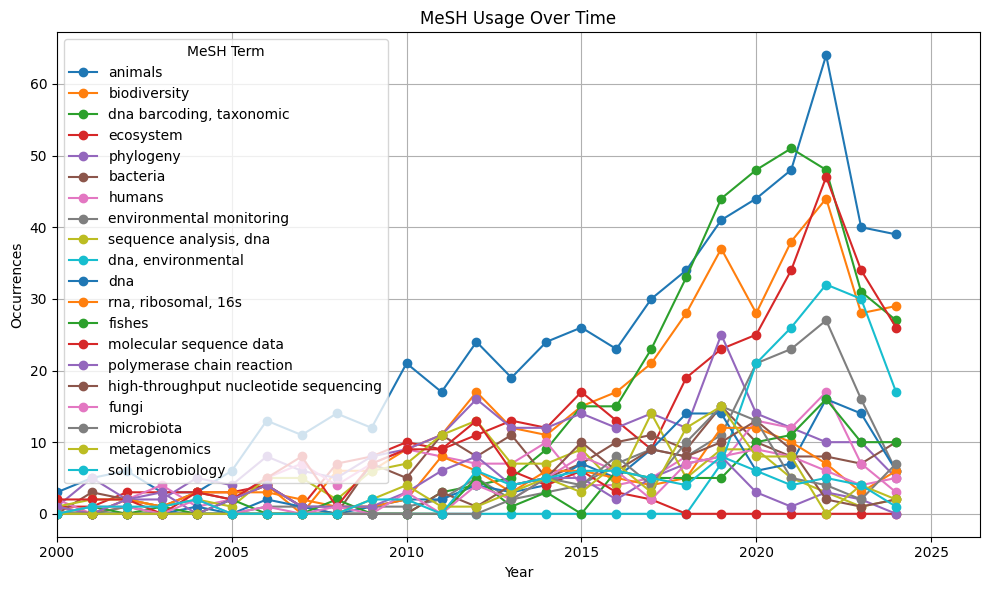

<Figure size 1200x600 with 0 Axes>

In [10]:
import numpy as np

# Select keywords to track
# keywords_to_plot = ["edna", "monitoring", "biodiversity", "metabarcoding"]
mesh_term_years[common_mesh].plot(figsize=(10, 6), marker='o')

# Start on 2000, comment for all years
plt.xlim(left=2000)

plt.title("MeSH Usage Over Time")
plt.xlabel("Year")
plt.ylabel("Occurrences")
plt.legend(title="MeSH Term")
plt.grid(True)
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.show()


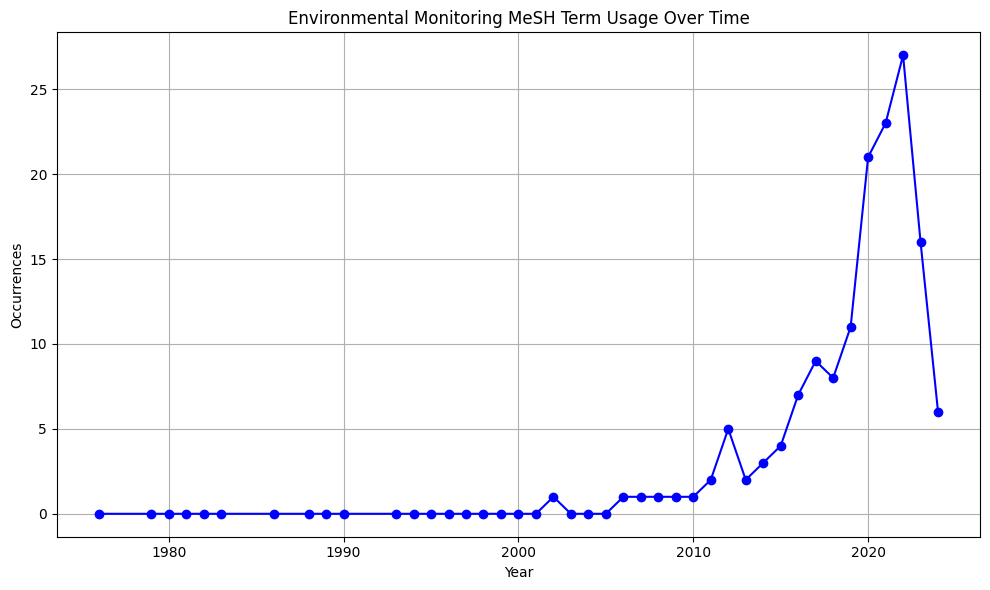

In [11]:
# Plot only one keyword
mesh_term_years['environmental monitoring'].plot(figsize=(10, 6), marker='o', color='blue')
plt.title("Environmental Monitoring MeSH Term Usage Over Time")
plt.xlabel("Year")
plt.ylabel("Occurrences")
plt.grid(True)
plt.tight_layout()
plt.show()

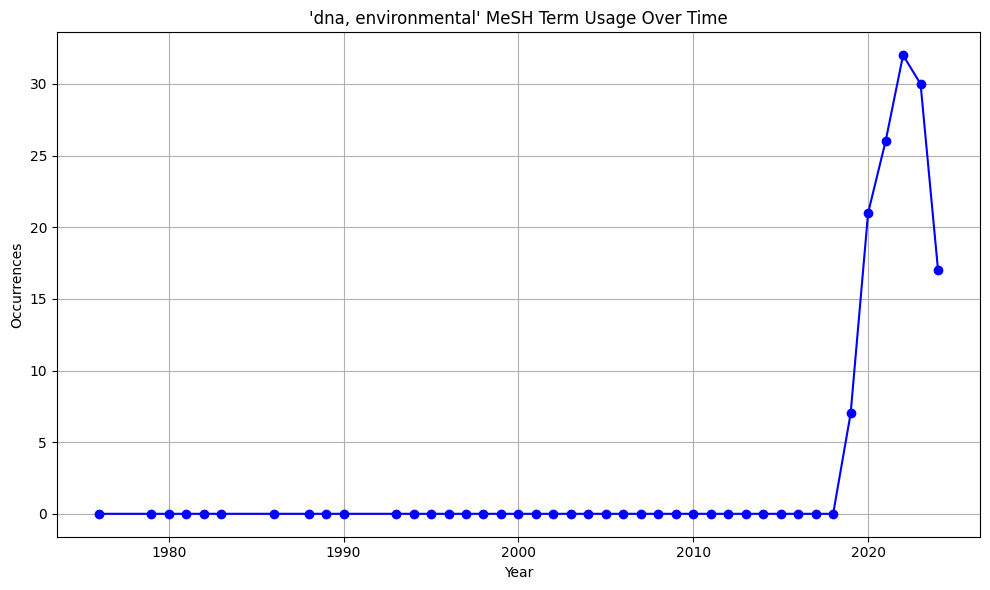

In [12]:
mesh_term_years['dna, environmental'].plot(figsize=(10, 6), marker='o', color='blue')
plt.title("'dna, environmental' MeSH Term Usage Over Time")
# Add all years to the x-axis
plt.xlabel("Year")
plt.ylabel("Occurrences")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
terms_of_interest = ["dna barcoding, taxonomic", "dna, environmental", "ecological parameter monitoring", "environmental monitoring", "dna", "oceans and seas", "rivers", "fresh water","wetlands", "bays", "lakes", "biological monitoring", "wastewater", "ponds"]

from collections import defaultdict
interest_years = defaultdict(lambda: defaultdict(int))

for _, row in mesh_df.iterrows():
    year = row["Year"]
    if year == "N/A":
        continue
    for kw in row["MeSH Terms"]:
        interest_years[kw.strip().lower()][year] += 1

terms_of_interest_df = pd.DataFrame(interest_years).fillna(0).astype(int).sort_index()


In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

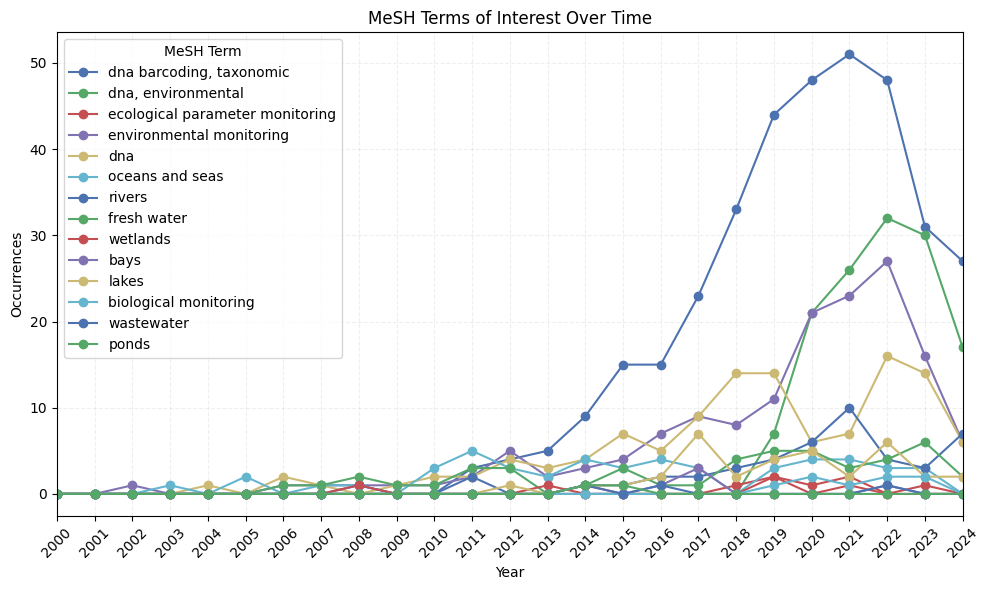

In [24]:
import matplotlib.pyplot as plt
terms_of_interest_df[terms_of_interest].plot(figsize=(10, 6), marker='o')
plt.title("MeSH Terms of Interest Over Time")
plt.xlim(left=2000, right=2024)
plt.xlim(right=2024)
# Add all years one by one with rotation 45
plt.xticks(np.arange(2000, 2025, 1), rotation=45)
plt.xlabel("Year")
plt.ylabel("Occurrences")
plt.legend(title="MeSH Term")
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

# Country, Publisher, Author

In [99]:
import pandas as pd

extended_df = pd.read_csv('extended-output.csv')
extended_df.head()

,DOI,Year,Keywords,MeSH Terms,Major Topics,Subheadings,Journal Abbreviation,Affiliation,Country,Grants,Authors,Publisher
0,10.1371/journal.pone.0238557,2021.0,NaN,Animals; Biodiversity; Biological Monitoring; ...,NaN,Methods; Analysis; Methods; Analysis; Methods;...,PLoS One,NaN,United States,NaN,Zachary Gold; Joshua Sprague; David J Kushner;...,NaN
1,10.1098/rsos.150088,2015.0,MiSeq; community ecology; environmental DNA; m...,NaN,NaN,NaN,R Soc Open Sci,NaN,England,NaN,M Miya; Y Sato; T Fukunaga; T Sado; J Y Poulse...,NaN
2,10.1371/journal.pone.0041732,2012.0,NaN,Animals; Biodiversity; Birds; Dna; Denmark; Ec...,Biodiversity; Ecosystem,Physiology; Metabolism; Methods; Physiology; M...,PLoS One,NaN,United States,NaN,Philip Francis Thomsen; Jos Kielgast; Lars Løn...,NaN
3,10.1371/journal.pone.0022746,2011.0,NaN,Animals; Anura; Aquatic Organisms; Dna; Ecosys...,Ecosystem; Rivers,Genetics; Genetics; Isolation & Purification; ...,PLoS One,NaN,United States,NaN,Caren S Goldberg; David S Pilliod; Robert S Ar...,NaN
4,10.1098/rsbl.2008.0118,2008.0,NaN,"Animals; Biodiversity; Dna, Mitochondrial; Env...",Biodiversity,Analysis; Methods; Chemistry; Genetics,Biol Lett,NaN,England,NaN,Gentile Francesco Ficetola; Claude Miaud; Fran...,NaN


In [100]:
extended_df.shape

(1607, 12)

In [101]:
country_df = extended_df[~extended_df['Country'].isnull()]
country_counts = country_df['Country'].value_counts().reset_index()
country_counts

,Country,count
0,England,729
1,United States,586
2,Switzerland,169
3,Netherlands,38
4,Germany,20
5,Bulgaria,18
6,Japan,5
7,China,4
8,Canada,2
9,India,2


In [102]:
# Based on https://python-graph-gallery.com/web-map-europe-with-color-by-country/
import geopandas as gpd
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/refs/heads/master/static/data/all_world.geojson"
world = gpd.read_file(url)
world.head()

,name,geometry
0,Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,United States of America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [103]:
# Rename a few entries on name
world['name'] = world['name'].replace({
    'United States of America': 'United States',
    'United Kingdom': 'England',
})

In [104]:
country_counts['Country'] = country_counts['Country'].replace({
    'Russia (Federation)': 'Russia',
    'Korea (South)': 'South Korea',
})

In [105]:
country_counts = world.merge(country_counts, how='left', left_on='name', right_on='Country')

In [106]:
country_counts

,name,geometry,Country,count
0,Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",NaN,NaN
1,Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",NaN,NaN
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,Canada,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,2.0
4,United States,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",United States,586.0
...,...,...,...,...
172,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN
173,Montenegro,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,...",NaN,NaN
174,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN
175,Trinidad and Tobago,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895...",NaN,NaN


In [107]:
# Drop column 'Country'
country_counts = country_counts.drop(columns=['Country'])

In [108]:
# Replace NaN values in 'count' with 0
country_counts['count'] = country_counts['count'].fillna(0)

In [109]:
country_counts

,name,geometry,count
0,Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",0.0
1,Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",0.0
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0
3,Canada,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",2.0
4,United States,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",586.0
...,...,...,...
172,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.0
173,Montenegro,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,...",0.0
174,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.0
175,Trinidad and Tobago,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895...",0.0


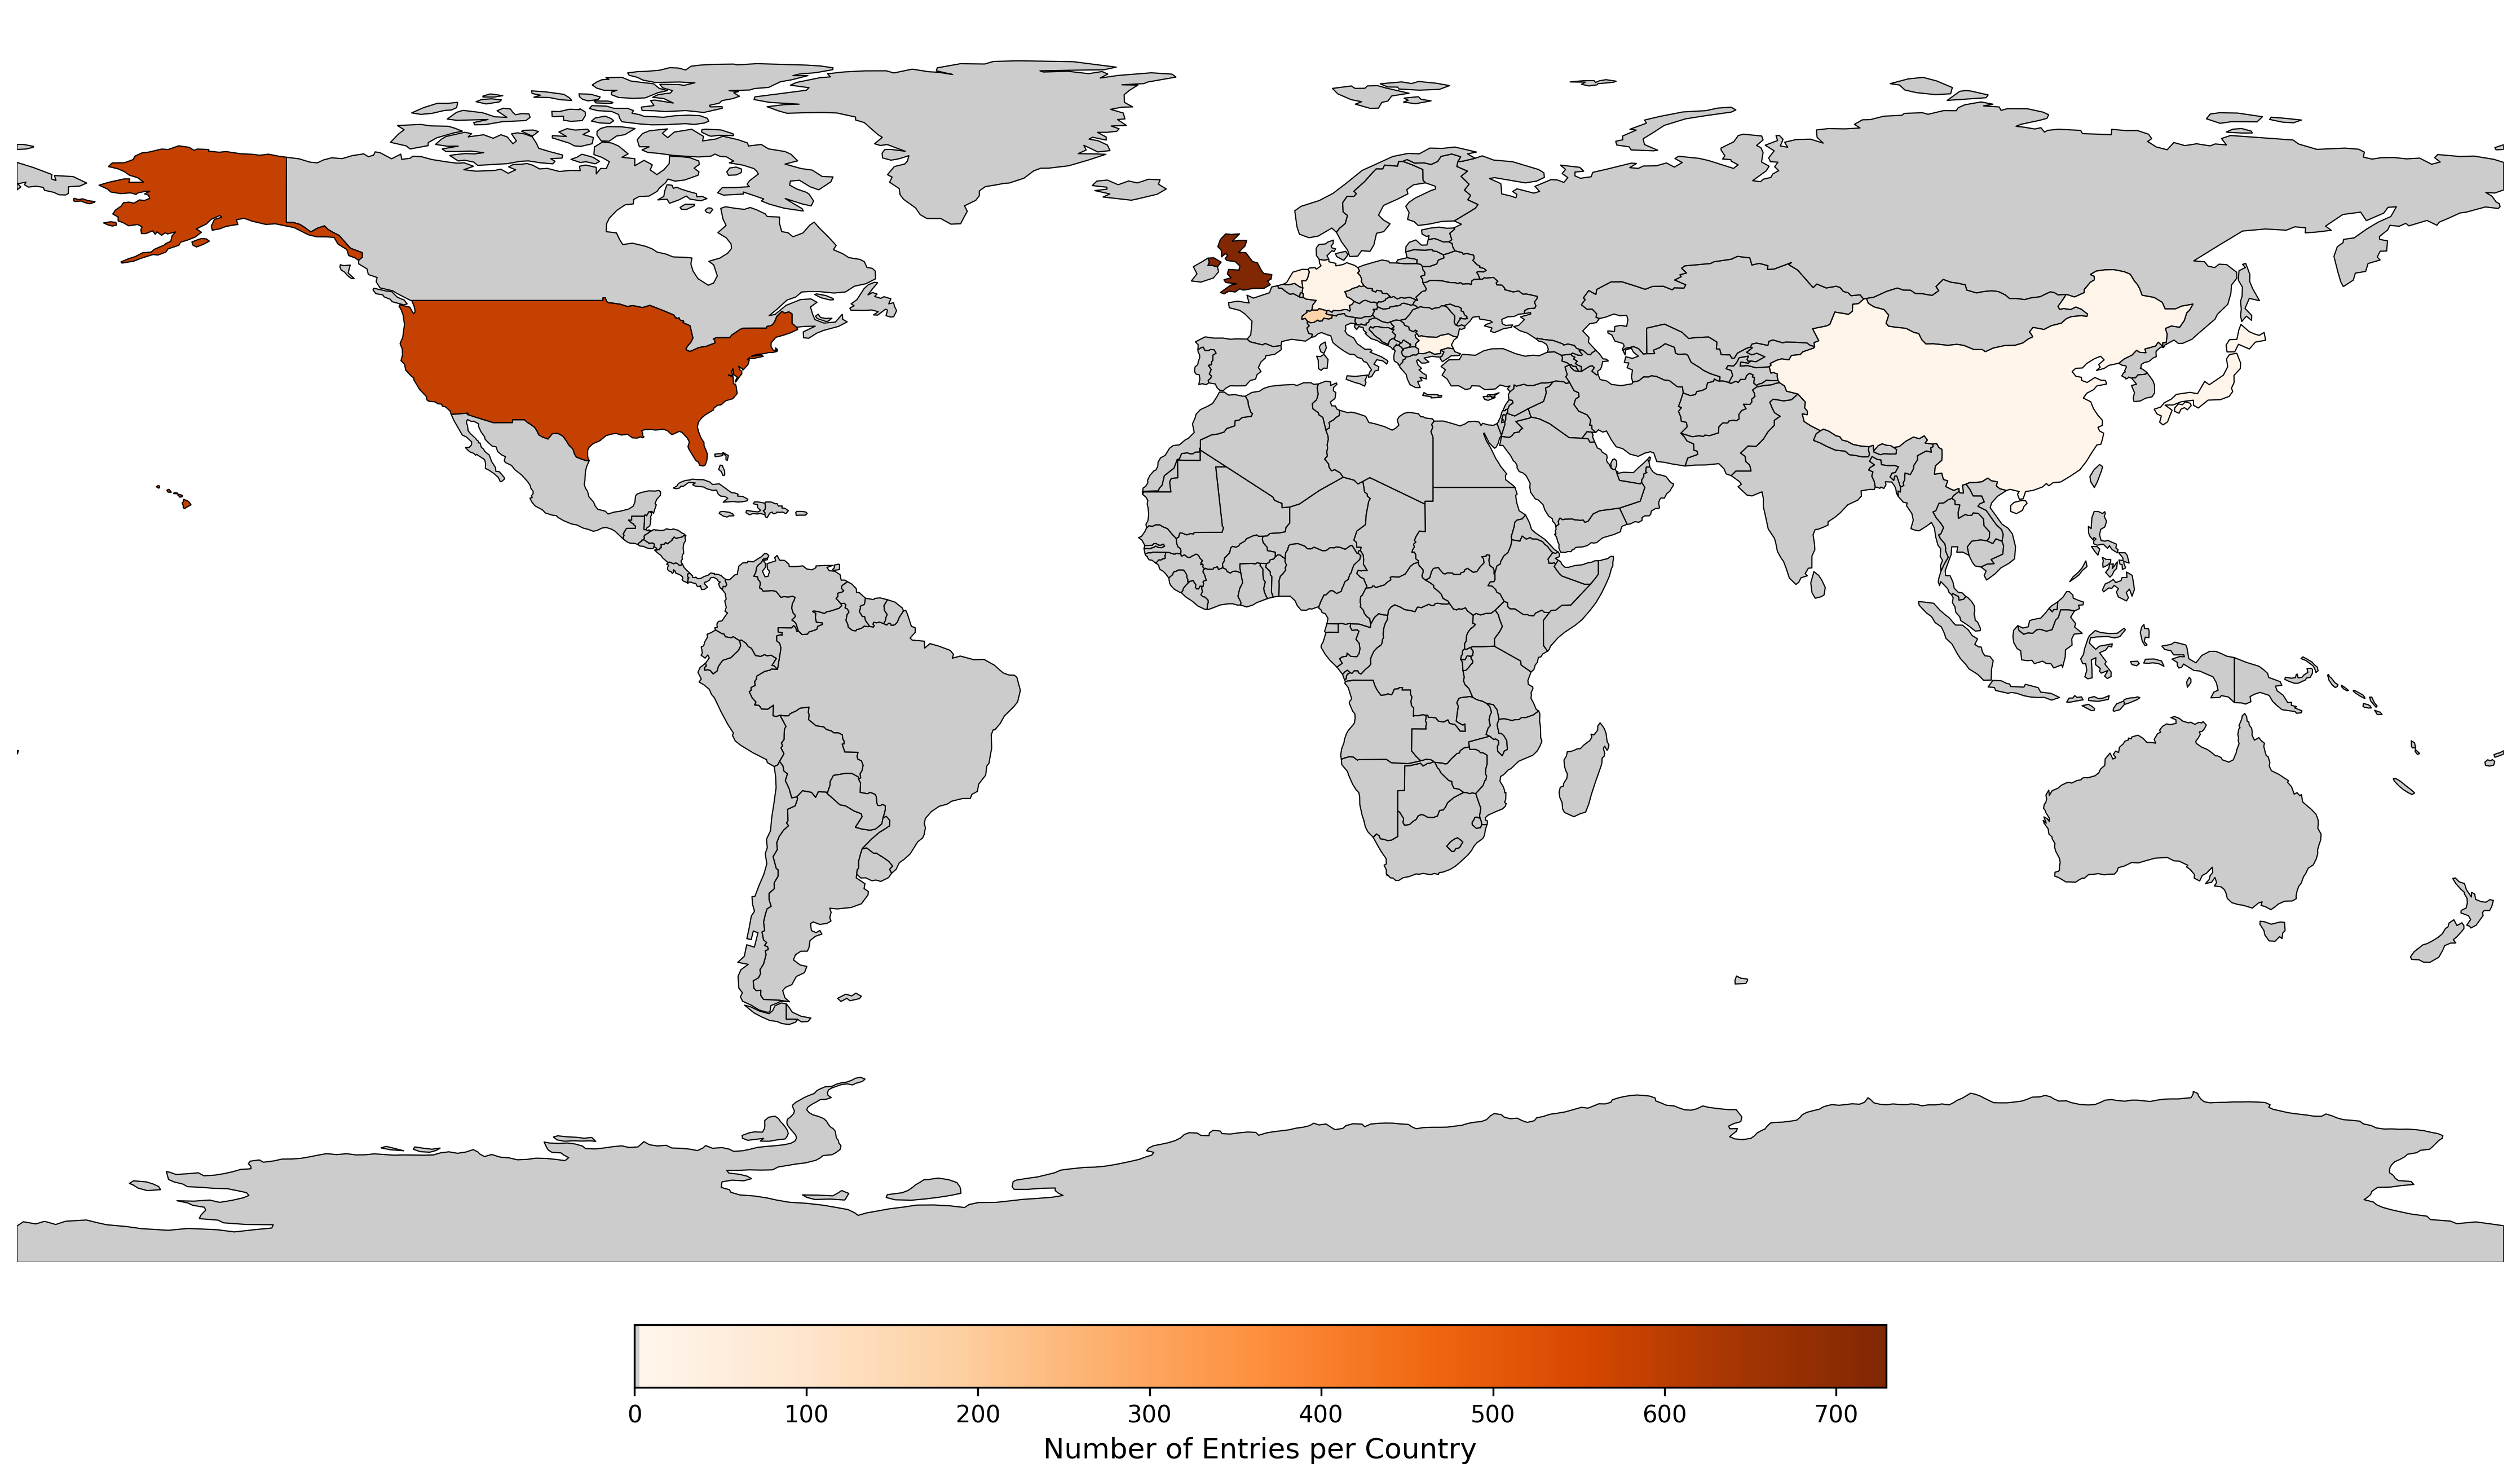

In [110]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi=300)
background_color = 'white'
text_color = 'black'

# Custom colormap with grey for zero counts
cmap = cm.Oranges
max_rate = country_counts['count'].max()

colors = [(0.8, 0.8, 0.8, 1.0)]  # grey for zero values
n_bins = 256
n_colors = n_bins - 1
colors += [cmap(i / n_colors) for i in range(n_colors)]

custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_Oranges', colors, N=n_bins)
norm = mcolors.Normalize(vmin=0, vmax=max_rate)

# Plotting
country_counts.plot(
    column='count',
    cmap=custom_cmap,
    norm=norm,
    ax=ax,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey"}
)

# Colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.04, pad=0.04)
cbar.set_label('Number of Entries per Country', size=12, color=text_color)
cbar.ax.xaxis.set_tick_params(color=text_color)
cbar.ax.tick_params(labelcolor=text_color)

# Set global extent to show whole world
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

ax.axis('off')
fig.patch.set_facecolor(background_color)

plt.tight_layout()
plt.show()


In [116]:
journal_df = extended_df[~extended_df['Journal Abbreviation'].isnull()]
journal_counts = journal_df['Journal Abbreviation'].value_counts().reset_index()
journal_counts

,Journal Abbreviation,count
0,PLoS One,203
1,Sci Rep,151
2,Ecol Evol,115
3,Proc Natl Acad Sci U S A,87
4,PeerJ,81
...,...,...
256,Int J Med Microbiol,1
257,Infect Immun,1
258,Arch Microbiol,1
259,Mar Genomics,1


In [121]:
journal_counts[journal_counts['count'] > 1]

,Journal Abbreviation,count
0,PLoS One,203
1,Sci Rep,151
2,Ecol Evol,115
3,Proc Natl Acad Sci U S A,87
4,PeerJ,81
...,...,...
121,Plant Physiol,2
122,J Chem Ecol,2
123,mSystems,2
124,Heliyon,2


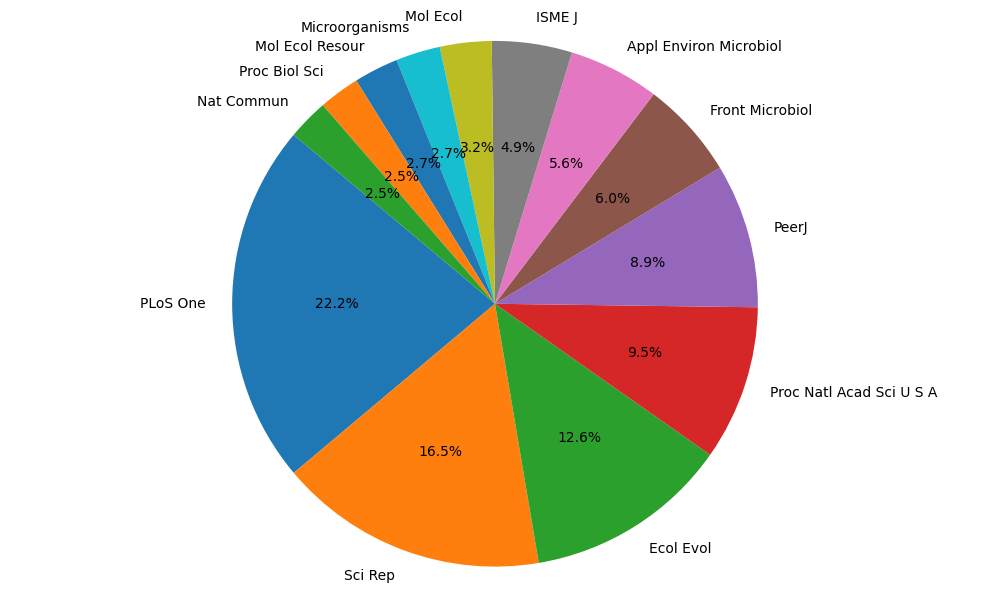

In [ ]:
# pie chart of the top 10 journals
top_journals = journal_counts.head(13)
plt.figure(figsize=(10, 6))
plt.pie(top_journals['count'], labels=top_journals['Journal Abbreviation'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# publications per author
author_df = extended_df[~extended_df['Authors'].isnull()]
author_df.shape

(1582, 12)

In [136]:
author_df

,DOI,Year,Keywords,MeSH Terms,Major Topics,Subheadings,Journal Abbreviation,Affiliation,Country,Grants,Authors,Publisher
0,10.1371/journal.pone.0238557,2021.0,NaN,Animals; Biodiversity; Biological Monitoring; ...,NaN,Methods; Analysis; Methods; Analysis; Methods;...,PLoS One,NaN,United States,NaN,Zachary Gold; Joshua Sprague; David J Kushner;...,NaN
1,10.1098/rsos.150088,2015.0,MiSeq; community ecology; environmental DNA; m...,NaN,NaN,NaN,R Soc Open Sci,NaN,England,NaN,M Miya; Y Sato; T Fukunaga; T Sado; J Y Poulse...,NaN
2,10.1371/journal.pone.0041732,2012.0,NaN,Animals; Biodiversity; Birds; Dna; Denmark; Ec...,Biodiversity; Ecosystem,Physiology; Metabolism; Methods; Physiology; M...,PLoS One,NaN,United States,NaN,Philip Francis Thomsen; Jos Kielgast; Lars Løn...,NaN
3,10.1371/journal.pone.0022746,2011.0,NaN,Animals; Anura; Aquatic Organisms; Dna; Ecosys...,Ecosystem; Rivers,Genetics; Genetics; Isolation & Purification; ...,PLoS One,NaN,United States,NaN,Caren S Goldberg; David S Pilliod; Robert S Ar...,NaN
4,10.1098/rsbl.2008.0118,2008.0,NaN,"Animals; Biodiversity; Dna, Mitochondrial; Env...",Biodiversity,Analysis; Methods; Chemistry; Genetics,Biol Lett,NaN,England,NaN,Gentile Francesco Ficetola; Claude Miaud; Fran...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1602,10.1093/molbev/msv092,2015.0,Medicago truncatula; SNP; linkage disequilibri...,"Adaptation, Physiological; Bacteria; Genes, Pl...","Genes, Plant; Medicago Truncatula; Plant Roots...",Genetics; Growth & Development; Genetics; Micr...,Mol Biol Evol,NaN,United States,NaN,Maxime Bonhomme; Simon Boitard; Hélène San Cle...,NaN
1603,10.3390/v10120715,2018.0,MCP; algal viruses; arctic; g23; marine; metab...,"Arctic Regions; Biodiversity; Dna Barcoding, T...",Ecosystem; Microbiota; Seasons,Genetics; Physiology; Virology; Genetics; Viro...,Viruses,NaN,Switzerland,NaN,Ruth-Anne Sandaa; Julia E Storesund; Emily Ole...,NaN
1604,10.1038/ismej.2015.125,2016.0,NaN,Antarctic Regions; Ecosystem; Metagenomics; Oc...,NaN,Virology; Classification; Genetics; Growth & D...,ISME J,NaN,England,NaN,Jennifer R Brum; Bonnie L Hurwitz; Oscar Schof...,NaN
1605,10.1073/pnas.1319778111,2014.0,Bayesian network; microbial ecology; virus,Bayes Theorem; Gene Regulatory Networks; Genes...,Gene Regulatory Networks; Marine Biology; Meta...,Genetics; Genetics,Proc Natl Acad Sci U S A,NaN,United States,NaN,Bonnie L Hurwitz; Anton H Westveld; Jennifer R...,NaN


In [138]:
# Count the number of publications per author (they are separated by semicolon in the Authors column)
author_df['Authors'] = author_df['Authors'].str.split('; ')
all_authors = [author.strip() for sublist in author_df['Authors'] for author in sublist]
author_counts = pd.Series(all_authors).value_counts().reset_index()
author_counts.columns = ['Author', 'Count']
author_counts = author_counts[author_counts['Count'] > 1]

/tmp/ipykernel_39091/1812525252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_df['Authors'] = author_df['Authors'].str.split('; ')


In [139]:
author_counts

,Author,Count
0,Mehrdad Hajibabaei,23
1,Michael Bunce,21
2,Pierre Taberlet,21
3,Simon Creer,18
4,Alice Valentini,18
...,...,...
1278,Louise Nørgaard,2
1279,Olga I Belykh,2
1280,Maciej Bartosiewicz,2
1281,Paula Huber,2


In [ ]:
# bar plot of the top 20 authors
plt.figure(figsize=(12, 8))
plt.barh(author_counts['Author'].head(20), author_counts['Count'].head(20), color='skyblue')
plt.xlabel('Number of Publications')
plt.ylabel('Author')
plt.title('Top 20 Authors by Number of Publications')
plt.gca().invert_yaxis()  # Invert y-axis to have the top author on top
plt.tight_layout()
plt.show()
# Save the author counts to a CSV file